# Local files

### Download and Uplaod

Download and upload files via the Spark Notebook interface.

### Access Local Files

The file path to local files requires `file://` prefix.

In [1]:
#ls /etc/passwd

# s3helper

The object `s3helper` is a tool to transfer files between local filesystem, HDFS and S3.

Run `s3helper.help()` to learn all its methods.

In [2]:
#s3helper.help()

## (2) Copy meta information files

In [3]:
s3helper.open_bucket('mas-dse-open',region='us-west-2')

In [4]:
info_files=s3helper.ls('Weather/Info')
Without_path=[x[13:] for x in info_files]


In [5]:
!mkdir /mnt/workspace/WeatherInfo

In [6]:
for i in range(len(info_files)-1):   # Last entry is the directory name
    _from=info_files[i]
    _to='/mnt/workspace/WeatherInfo/'+Without_path[i]
    print('From %s to %s'%(_from,_to))
    s3helper.s3_to_local(_from,_to)

From Weather/Info/README.md to /mnt/workspace/WeatherInfo/README.md
From Weather/Info/US_stations.tsv.gz to /mnt/workspace/WeatherInfo/US_stations.tsv.gz
From Weather/Info/all_stations.tsv.gz to /mnt/workspace/WeatherInfo/all_stations.tsv.gz
From Weather/Info/data-source.txt to /mnt/workspace/WeatherInfo/data-source.txt
From Weather/Info/dist2coast.txt.gz to /mnt/workspace/WeatherInfo/dist2coast.txt.gz
From Weather/Info/ghcnd-readme.txt to /mnt/workspace/WeatherInfo/ghcnd-readme.txt
From Weather/Info/ghcnd-stations_buffered.txt to /mnt/workspace/WeatherInfo/ghcnd-stations_buffered.txt
From Weather/Info/ghcnd-version.txt to /mnt/workspace/WeatherInfo/ghcnd-version.txt
From Weather/Info/stations_projections.pickle to /mnt/workspace/WeatherInfo/stations_projections.pickle


### Link to original information

Looking in README.md, you see that all of the data can be downloaded from the noaa web site.

In [7]:
# %load /mnt/workspace/WeatherInfo/ghcnd-readme.txt
README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) 
Version 3.00

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

I. DOWNLOAD QUICK START

Start by downloading "ghcnd-stations.txt," which has metadata for all stations.

Then download one of the following TAR files:

  - "ghcnd-all.tar.gz" if you want all of GHCN-Daily, OR
  - "ghcnd-gsn.tar.gz" if you only want the GCOS Surface Network (GSN), OR
  - "ghcnd-hcn.tar.gz" if you only want the U.S. Historical Climatology Network 
    (U.S. HCN).

Then uncompress and untar the contents of the tar file, 
e.g., by using the following Linux command:

tar xzvf ghcnd_xxx.tar.gz

Where "xxx" stands for "all", "hcn", or "gsn" as applicable. The files will be 
extracted into a subdirectory under the directory where the command is issued.

ALTERNATIVELY, if you only need data for one station:

  - Find the station's name in "ghcnd-stations.txt" and note its station
    identification code (e.g., PHOENIX AP (Airport) is "USW00023183"); and
  - Download the data file (i.e., ".dly" file) that corresponds to this code
    (e.g., "USW00023183.dly" has the data for PHOENIX AP).  
    Note that the ".dly" file is located in the "all" subdirectory.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

II. CONTENTS OF ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily

all:                  Directory with ".dly" files for all of GHCN-Daily
gsn:                  Directory with ".dly" files for the GCOS Surface Network 
                     (GSN)
hcn:                  Directory with ".dly" files for U.S. HCN
by_year:              Directory with GHCN Daily files parsed into yearly
                      subsets with observation times where available.  See the
		      /by_year/readme.txt and 
		      /by_year/ghcn-daily-by_year-format.rtf 
		      files for further information
grid:	              Directory with the GHCN-Daily gridded dataset known 
                      as HadGHCND
papers:		      Directory with pdf versions of journal articles relevant 
                      to the GHCN-Daily dataset
figures:	      Directory containing figures that summarize the inventory 
                      of GHCN-Daily station records		    

ghcnd-all.tar.gz:  TAR file of the GZIP-compressed files in the "all" directory
ghcnd-gsn.tar.gz:  TAR file of the GZIP-compressed "gsn" directory
ghcnd-hcn.tar.gz:  TAR file of the GZIP-compressed "hcn" directory

ghcnd-countries.txt:  List of country codes (FIPS) and names
ghcnd-inventory.txt:  File listing the periods of record for each station and 
                      element
ghcnd-stations.txt:   List of stations and their metadata (e.g., coordinates)
ghcnd-states.txt:     List of U.S. state and Canadian Province codes 
                      used in ghcnd-stations.txt
ghcnd-version.txt:    File that specifies the current version of GHCN Daily

readme.txt:           This file
status.txt:           Notes on the current status of GHCN-Daily

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

III. FORMAT OF DATA FILES (".dly" FILES)

Each ".dly" file contains data for one station.  The name of the file
corresponds to a station's identification code.  For example, "USC00026481.dly"
contains the data for the station with the identification code USC00026481).

Each record in a file contains one month of daily data.  The variables on each
line include the following:

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
YEAR         12-15   Integer
MONTH        16-17   Integer
ELEMENT      18-21   Character
VALUE1       22-26   Integer
MFLAG1       27-27   Character
QFLAG1       28-28   Character
SFLAG1       29-29   Character
VALUE2       30-34   Integer
MFLAG2       35-35   Character
QFLAG2       36-36   Character
SFLAG2       37-37   Character
  .           .          .
  .           .          .
  .           .          .
VALUE31    262-266   Integer
MFLAG31    267-267   Character
QFLAG31    268-268   Character
SFLAG31    269-269   Character
------------------------------

These variables have the following definitions:

ID         is the station identification code.  Please see "ghcnd-stations.txt"
           for a complete list of stations and their metadata.
YEAR       is the year of the record.

MONTH      is the month of the record.

ELEMENT    is the element type.   There are five core elements as well as a number
           of addition elements.  
	   
	   The five core elements are:

           PRCP = Precipitation (tenths of mm)
   	   SNOW = Snowfall (mm)
	   SNWD = Snow depth (mm)
           TMAX = Maximum temperature (tenths of degrees C)
           TMIN = Minimum temperature (tenths of degrees C)
	   
	   The other elements are:
	   
	   ACMC = Average cloudiness midnight to midnight from 30-second 
	          ceilometer data (percent)
	   ACMH = Average cloudiness midnight to midnight from 
	          manual observations (percent)
           ACSC = Average cloudiness sunrise to sunset from 30-second 
	          ceilometer data (percent)
	   ACSH = Average cloudiness sunrise to sunset from manual 
	          observations (percent)
	   AWND = Average daily wind speed (tenths of meters per second)
	   DAEV = Number of days included in the multiday evaporation
	          total (MDEV)
	   DAPR = Number of days included in the multiday precipiation 
	          total (MDPR)
           DASF = Number of days included in the multiday snowfall 
	          total (MDSF)		  
	   DATN = Number of days included in the multiday minimum temperature 
	         (MDTN)
	   DATX = Number of days included in the multiday maximum temperature 
	          (MDTX)
           DAWM = Number of days included in the multiday wind movement
	          (MDWM)
	   DWPR = Number of days with non-zero precipitation included in 
	          multiday precipitation total (MDPR)
	   EVAP = Evaporation of water from evaporation pan (tenths of mm)
	   FMTM = Time of fastest mile or fastest 1-minute wind 
	          (hours and minutes, i.e., HHMM)
	   FRGB = Base of frozen ground layer (cm)
	   FRGT = Top of frozen ground layer (cm)
	   FRTH = Thickness of frozen ground layer (cm)
	   GAHT = Difference between river and gauge height (cm)
	   MDEV = Multiday evaporation total (tenths of mm; use with DAEV)
	   MDPR = Multiday precipitation total (tenths of mm; use with DAPR and 
	          DWPR, if available)
	   MDSF = Multiday snowfall total 
	   MDTN = Multiday minimum temperature (tenths of degrees C; use with 
	          DATN)
	   MDTX = Multiday maximum temperature (tenths of degress C; use with 
	          DATX)
	   MDWM = Multiday wind movement (km)
           MNPN = Daily minimum temperature of water in an evaporation pan 
	         (tenths of degrees C)
           MXPN = Daily maximum temperature of water in an evaporation pan 
	         (tenths of degrees C)
	   PGTM = Peak gust time (hours and minutes, i.e., HHMM)
	   PSUN = Daily percent of possible sunshine (percent)
	   SN*# = Minimum soil temperature (tenths of degrees C)
	          where * corresponds to a code
	          for ground cover and # corresponds to a code for soil 
		  depth.  
		  
		  Ground cover codes include the following:
		  0 = unknown
		  1 = grass
		  2 = fallow
		  3 = bare ground
		  4 = brome grass
		  5 = sod
		  6 = straw multch
		  7 = grass muck
		  8 = bare muck
		  
		  Depth codes include the following:
		  1 = 5 cm
		  2 = 10 cm
		  3 = 20 cm
		  4 = 50 cm
		  5 = 100 cm
		  6 = 150 cm
		  7 = 180 cm
		  
	   SX*# = Maximum soil temperature (tenths of degrees C) 
	          where * corresponds to a code for ground cover 
		  and # corresponds to a code for soil depth. 
		  See SN*# for ground cover and depth codes. 

           THIC = Thickness of ice on water (tenths of mm)	
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
	   TSUN = Daily total sunshine (minutes)
	   WDF1 = Direction of fastest 1-minute wind (degrees)
	   WDF2 = Direction of fastest 2-minute wind (degrees)
	   WDF5 = Direction of fastest 5-second wind (degrees)
	   WDFG = Direction of peak wind gust (degrees)
	   WDFI = Direction of highest instantaneous wind (degrees)
	   WDFM = Fastest mile wind direction (degrees)
           WDMV = 24-hour wind movement (km)	   
           WESD = Water equivalent of snow on the ground (tenths of mm)
	   WESF = Water equivalent of snowfall (tenths of mm)
	   WSF1 = Fastest 1-minute wind speed (tenths of meters per second)
	   WSF2 = Fastest 2-minute wind speed (tenths of meters per second)
	   WSF5 = Fastest 5-second wind speed (tenths of meters per second)
	   WSFG = Peak guest wind speed (tenths of meters per second)
	   WSFI = Highest instantaneous wind speed (tenths of meters per second)
	   WSFM = Fastest mile wind speed (tenths of meters per second)
	   WT** = Weather Type where ** has one of the following values:
	   
                  01 = Fog, ice fog, or freezing fog (may include heavy fog)
                  02 = Heavy fog or heaving freezing fog (not always 
		       distinquished from fog)
                  03 = Thunder
                  04 = Ice pellets, sleet, snow pellets, or small hail 
                  05 = Hail (may include small hail)
                  06 = Glaze or rime 
                  07 = Dust, volcanic ash, blowing dust, blowing sand, or 
		       blowing obstruction
                  08 = Smoke or haze 
                  09 = Blowing or drifting snow
                  10 = Tornado, waterspout, or funnel cloud 
                  11 = High or damaging winds
                  12 = Blowing spray
                  13 = Mist
                  14 = Drizzle
                  15 = Freezing drizzle 
                  16 = Rain (may include freezing rain, drizzle, and
		       freezing drizzle) 
                  17 = Freezing rain 
                  18 = Snow, snow pellets, snow grains, or ice crystals
                  19 = Unknown source of precipitation 
                  21 = Ground fog 
                  22 = Ice fog or freezing fog
		  
            WV** = Weather in the Vicinity where ** has one of the following 
	           values:
		   
		   01 = Fog, ice fog, or freezing fog (may include heavy fog)
		   03 = Thunder
		   07 = Ash, dust, sand, or other blowing obstruction
		   18 = Snow or ice crystals
		   20 = Rain or snow shower
		   
VALUE1     is the value on the first day of the month (missing = -9999).

MFLAG1     is the measurement flag for the first day of the month.  There are
           ten possible values:

           Blank = no measurement information applicable
           B     = precipitation total formed from two 12-hour totals
           D     = precipitation total formed from four six-hour totals
	   H     = represents highest or lowest hourly temperature
	   K     = converted from knots 
	   L     = temperature appears to be lagged with respect to reported
	           hour of observation 
           O     = converted from oktas 
	   P     = identified as "missing presumed zero" in DSI 3200 and 3206
           T     = trace of precipitation, snowfall, or snow depth
	   W     = converted from 16-point WBAN code (for wind direction)

QFLAG1     is the quality flag for the first day of the month.  There are 
           fourteen possible values:

           Blank = did not fail any quality assurance check
           D     = failed duplicate check
           G     = failed gap check
           I     = failed internal consistency check
           K     = failed streak/frequent-value check
	   L     = failed check on length of multiday period 
           M     = failed megaconsistency check
           N     = failed naught check
           O     = failed climatological outlier check
           R     = failed lagged range check
           S     = failed spatial consistency check
           T     = failed temporal consistency check
           W     = temperature too warm for snow
           X     = failed bounds check
	   Z     = flagged as a result of an official Datzilla 
	           investigation

SFLAG1     is the source flag for the first day of the month.  There are 
           twenty seven possible values (including blank, upper and 
	   lower case letters):

           Blank = No source (i.e., data value missing)
           0     = U.S. Cooperative Summary of the Day (NCDC DSI-3200)
           6     = CDMP Cooperative Summary of the Day (NCDC DSI-3206)
           7     = U.S. Cooperative Summary of the Day -- Transmitted 
	           via WxCoder3 (NCDC DSI-3207)
           A     = U.S. Automated Surface Observing System (ASOS) 
                   real-time data (since January 1, 2006)
	   a     = Australian data from the Australian Bureau of Meteorology
           B     = U.S. ASOS data for October 2000-December 2005 (NCDC 
                   DSI-3211)
	   b     = Belarus update
	   E     = European Climate Assessment and Dataset (Klein Tank 
	           et al., 2002)	   
           F     = U.S. Fort data 
           G     = Official Global Climate Observing System (GCOS) or 
                   other government-supplied data
           H     = High Plains Regional Climate Center real-time data
           I     = International collection (non U.S. data received through
	           personal contacts)
           K     = U.S. Cooperative Summary of the Day data digitized from
	           paper observer forms (from 2011 to present)
           M     = Monthly METAR Extract (additional ASOS data)
	   N     = Community Collaborative Rain, Hail,and Snow (CoCoRaHS)
	   Q     = Data from several African countries that had been 
	           "quarantined", that is, withheld from public release
		   until permission was granted from the respective 
	           meteorological services
           R     = NCDC Reference Network Database (Climate Reference Network
	           and Historical Climatology Network-Modernized)
	   r     = All-Russian Research Institute of Hydrometeorological 
	           Information-World Data Center
           S     = Global Summary of the Day (NCDC DSI-9618)
                   NOTE: "S" values are derived from hourly synoptic reports
                   exchanged on the Global Telecommunications System (GTS).
                   Daily values derived in this fashion may differ significantly
                   from "true" daily data, particularly for precipitation
                   (i.e., use with caution).
           T     = SNOwpack TELemtry (SNOTEL) data obtained from the Western
	           Regional Climate Center
	   U     = Remote Automatic Weather Station (RAWS) data obtained
	           from the Western Regional Climate Center	   
	   u     = Ukraine update	   
	   W     = WBAN/ASOS Summary of the Day from NCDC's Integrated 
	           Surface Data (ISD).  
           X     = U.S. First-Order Summary of the Day (NCDC DSI-3210)
	   Z     = Datzilla official additions or replacements 
	   z     = Uzbekistan update
	   
	   When data are available for the same time from more than one source,
	   the highest priority source is chosen according to the following
	   priority order (from highest to lowest):
	   Z,R,0,6,X,W,K,7,F,B,M,r,E,z,u,b,a,G,Q,I,A,N,H,S
	   
	   
VALUE2     is the value on the second day of the month

MFLAG2     is the measurement flag for the second day of the month.

QFLAG2     is the quality flag for the second day of the month.

SFLAG2     is the source flag for the second day of the month.

... and so on through the 31st day of the month.  Note: If the month has less 
than 31 days, then the remaining variables are set to missing (e.g., for April, 
VALUE31 = -9999, MFLAG31 = blank, QFLAG31 = blank, SFLAG31 = blank).

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

IV. FORMAT OF "ghcnd-stations.txt"

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSNFLAG      73-75   Character
HCNFLAG      77-79   Character
WMOID        81-85   Character
------------------------------

These variables have the following definitions:

ID         is the station identification code.  Note that the first two
           characters denote the FIPS  country code, the third character 
           is a network code that identifies the station numbering system 
           used, and the remaining eight characters contain the actual 
           station ID. 

           See "ghcnd-countries.txt" for a complete list of country codes.
	   See "ghcnd-states.txt" for a list of state/province/territory codes.

           The network code  has the following five values:

           0 = unspecified (station identified by up to eight 
	       alphanumeric characters)
	   1 = Community Collaborative Rain, Hail,and Snow (CoCoRaHS)
	       based identification number.  To ensure consistency with
	       with GHCN Daily, all numbers in the original CoCoRaHS IDs
	       have been left-filled to make them all four digits long. 
	       In addition, the characters "-" and "_" have been removed 
	       to ensure that the IDs do not exceed 11 characters when 
	       preceded by "US1". For example, the CoCoRaHS ID 
	       "AZ-MR-156" becomes "US1AZMR0156" in GHCN-Daily
           C = U.S. Cooperative Network identification number (last six 
               characters of the GHCN-Daily ID)
	   E = Identification number used in the ECA&D non-blended
	       dataset
	   M = World Meteorological Organization ID (last five
	       characters of the GHCN-Daily ID)
	   N = Identification number used in data supplied by a 
	       National Meteorological or Hydrological Center
	   R = U.S. Interagency Remote Automatic Weather Station (RAWS)
	       identifier
	   S = U.S. Natural Resources Conservation Service SNOwpack
	       TELemtry (SNOTEL) station identifier
           W = WBAN identification number (last five characters of the 
               GHCN-Daily ID)

LATITUDE   is latitude of the station (in decimal degrees).

LONGITUDE  is the longitude of the station (in decimal degrees).

ELEVATION  is the elevation of the station (in meters, missing = -999.9).


STATE      is the U.S. postal code for the state (for U.S. stations only).

NAME       is the name of the station.

GSNFLAG    is a flag that indicates whether the station is part of the GCOS
           Surface Network (GSN). The flag is assigned by cross-referencing 
           the number in the WMOID field with the official list of GSN 
           stations. There are two possible values:

           Blank = non-GSN station or WMO Station number not available
           GSN   = GSN station 

HCNFLAG    is a flag that indicates whether the station is part of the U.S.
           Historical Climatology Network (HCN).  There are two possible values:

           Blank = non-HCN station
           HCN   = HCN station

WMOID      is the World Meteorological Organization (WMO) number for the
           station.  If the station has no WMO number, then the field is blank.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

V. FORMAT OF "ghcnd-countries.txt"

------------------------------
Variable   Columns   Type
------------------------------
CODE          1-2    Character
NAME         4-50    Character
------------------------------

These variables have the following definitions:

CODE       is the FIPS country code of the country where the station is 
           located (from FIPS Publication 10-4 at 
           www.cia.gov/cia/publications/factbook/appendix/appendix-d.html).

NAME       is the name of the country.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

VI. FORMAT OF "ghcnd-states.txt"

------------------------------
Variable   Columns   Type
------------------------------
CODE          1-2    Character
NAME         4-50    Character
------------------------------

These variables have the following definitions:

CODE       is the POSTAL code of the U.S. state/territory or Canadian 
           province where the station is located 

NAME       is the name of the state, territory or province.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

VII. FORMAT OF "ghcnd-inventory.txt"

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEMENT      32-35   Character
FIRSTYEAR    37-40   Integer
LASTYEAR     42-45   Integer
------------------------------

These variables have the following definitions:

ID         is the station identification code.  Please see "ghcnd-stations.txt"
           for a complete list of stations and their metadata.

LATITUDE   is the latitude of the station (in decimal degrees).

LONGITUDE  is the longitude of the station (in decimal degrees).

ELEMENT    is the element type.  See section III for a definition of elements.

FIRSTYEAR  is the first year of unflagged data for the given element.

LASTYEAR   is the last year of unflagged data for the given element.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

VIII.  REFERENCES

Klein Tank, A.M.G. and Coauthors, 2002. Daily dataset of 20th-century surface
air temperature and precipitation series for the European Climate Assessment.
Int. J. of Climatol., 22, 1441-1453.
Data and metadata available at http://eca.knmi.nl



For additional information, please send an e-mail to ncdc.ghcnd@noaa.gov.


SyntaxError: invalid syntax (<ipython-input-7-5ca04755bac1>, line 2)

## Open Main data bucket

In [8]:
s3helper.open_bucket('dse-weather-west-2', region="us-west-2")
s3helper.ls('')

[u'.aws',
 u'.bash_profile',
 u'.bashrc',
 u'.conda',
 u'.ipython',
 u'.jupyter',
 u'.local',
 u'.ssh',
 u'ALL.csv.gz',
 u'ALLBootstrap.sh',
 u'MasterBootstrap.sh',
 u'NY.parquet',
 u'PrivateBootstrap.sh',
 u'RunFromTerminal.sh',
 u'US_Weather_with_smoothed.parquet',
 u'US_Weather_with_smoothed.parquet_$folder$',
 u'US_stations.parquet',
 u'US_weather.parquet',
 u'fromLocal',
 u'info',
 u's3helper.py',
 u's3hook.sh',
 u'weather.parquet']

## (3) List files in the S3 bucket and HDFS.

In [9]:
print('list all files in the root directory of the bucket')
print("\n".join(s3helper.ls_s3()))
print('\nList files in directory "fromHDFS"')
print(s3helper.ls_s3('fromHDFS'))
print('\nList files in root of hdfs')
print(s3helper.ls_hdfs());

list all files in the root directory of the bucket
.aws
.bash_profile
.bashrc
.conda
.ipython
.jupyter
.local
.ssh
ALL.csv.gz
ALLBootstrap.sh
MasterBootstrap.sh
NY.parquet
PrivateBootstrap.sh
RunFromTerminal.sh
US_Weather_with_smoothed.parquet
US_Weather_with_smoothed.parquet_$folder$
US_stations.parquet
US_weather.parquet
fromLocal
info
s3helper.py
s3hook.sh
weather.parquet

List files in directory "fromHDFS"
[]

List files in root of hdfs
Found 3 items
drwxrwxrwt   - hdfs hadoop          0 2020-05-04 18:32 /tmp
drwxr-xr-x   - hdfs hadoop          0 2020-05-04 18:32 /user
drwxr-xr-x   - hdfs hadoop          0 2020-05-04 18:32 /var

None


## (4) Move files around local filesystem, HDFS and S3

As described in `s3helper.help()`, there are five methods for file transfers:

1. `s3helper.s3_to_hdfs(<s3_directory_path>, <HDFS_directory_path>)`
2. `s3helper.hdfs_to_s3(<HDFS_directory_path>, <s3_directory_path>)`
3. `s3helper.s3_to_local(<s3_file_path>, <local_file_path>)`
4. `s3helper.local_to_s3(<local_file_path>, <s3_directory_path>)`
5. `s3helper.local_to_hdfs(<local_dir_path>, <HDFS_dir_path>)`

In [10]:
s3helper.local_to_s3("/home/hadoop/s3helper.py", "fromLocal/s3helper.py")

In [11]:
print(s3helper.ls_s3("fromLocal"))

[u'fromLocal/s3helper.py']


## Move data from S3 to HDFS to Dataframe

In [12]:
%%time
s3helper.s3_to_hdfs("weather.parquet", "/tmp/weather.parquet")

20/05/04 20:33:55 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/_SUCCESS' for reading
20/05/04 20:33:55 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00000-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading
20/05/04 20:33:56 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00001-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading
20/05/04 20:33:57 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00002-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading
20/05/04 20:33:58 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00003-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading
20/05/04 20:33:59 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00004-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for

Found 59 items
-rw-r--r--   2 hadoop hadoop          0 2020-05-04 20:33 /tmp/weather.parquet/_SUCCESS
-rw-r--r--   2 hadoop hadoop   40670401 2020-05-04 20:33 /tmp/weather.parquet/part-00000-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   2 hadoop hadoop   40307528 2020-05-04 20:33 /tmp/weather.parquet/part-00001-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   2 hadoop hadoop   40016618 2020-05-04 20:33 /tmp/weather.parquet/part-00002-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   2 hadoop hadoop   40377232 2020-05-04 20:33 /tmp/weather.parquet/part-00003-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   2 hadoop hadoop   40119938 2020-05-04 20:33 /tmp/weather.parquet/part-00004-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   2 hadoop hadoop   40278884 2020-05-04 20:34 /tmp/weather.parquet/part-00005-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet
-rw-r--r--   2 hadoop 

In [13]:
%%time 
s3helper.s3_to_hdfs("info/stations.parquet", "/tmp/stations.parquet")

20/05/04 20:34:57 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_SUCCESS' for reading
20/05/04 20:34:57 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_common_metadata' for reading
20/05/04 20:34:57 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_metadata' for reading
20/05/04 20:34:57 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/part-r-00000-1fd04699-91d3-4a2a-9b36-e25c9c5f0376.gz.parquet' for reading
20/05/04 20:34:57 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/part-r-00001-1fd04699-91d3-4a2a-9b36-e25c9c5f0376.gz.parquet' for reading

Found 5 items
-rw-r--r--   2 hadoop hadoop          0 2020-05-04 20:34 /tmp/stations.parquet/_SUCCESS
-rw-r--r--   2 hadoop hadoop        894 2020-05-04 20:34 /tmp/stations.parquet/_common_metadata
-rw-r--r--   2 hadoop hadoop       3107 2020-05-04 20:34 /tmp/s

In [15]:
print(s3helper.ls_hdfs("/tmp"))

Found 3 items
drwxrwxrwx   - mapred mapred          0 2020-05-04 18:32 /tmp/hadoop-yarn
drwxr-xr-x   - hadoop hadoop          0 2020-05-04 20:34 /tmp/stations.parquet
drwxr-xr-x   - hadoop hadoop          0 2020-05-04 20:34 /tmp/weather.parquet

None


## Up to here needs to be executed once each time a spark cluster is created.
The HDFS files will stay there as long as you keep the cluster on.

# From here down needs to be executed each time a notebooks is restarted

In [18]:
#sc.stop()

In [19]:
%%time
from pyspark import SparkContext

sc = SparkContext()

from pyspark import SparkContext
from pyspark.sql import SQLContext

sqlContext = SQLContext(sc)

CPU times: user 168 ms, sys: 28 ms, total: 196 ms
Wall time: 15.4 s


In [20]:
%%time
df = sqlContext.sql("SELECT * FROM parquet.`/tmp/weather.parquet`")

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 9.33 s


In [21]:
%%time
stations=sqlContext.sql("SELECT * FROM parquet.`/tmp/stations.parquet`")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 206 ms


In [22]:
%%time
df.count()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16 s


9358394

In [23]:
df.show()

+-----------+-----------+----+--------------------+
|    Station|Measurement|Year|              Values|
+-----------+-----------+----+--------------------+
|USW00093819|       WDFM|1972|[38 58 EC 5C 38 5...|
|USW00093819|       WDFM|1973|[38 5C EC 5C 08 5...|
|USW00093819|       WDFM|1974|[EC 5C A0 51 EC 5...|
|USW00093819|       WDFM|1975|[EC 5C 38 58 38 5...|
|USW00093819|       WDFM|1976|[38 58 38 58 38 5...|
|USW00093819|       WDFM|1977|[EC 5C 38 5C A0 5...|
|USW00093819|       WDFM|1978|[38 5C 08 5B EC 5...|
|USW00093819|       WDFM|1979|[EC 5C 38 5C 08 5...|
|USW00093819|       WESD|1952|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1953|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1954|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1955|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1956|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1957|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1958|[00 7E 00 7E 00 7...|
|USW00093819|       WESD|1959|[00 7E 00 7E 00 7...|
|USW00093819

### Example: Counting the number of stations in each country

In [24]:
stations.show()

+-----------+--------+---------+---------+-----+-------------+-------+-------+-----+
|         ID|latitude|longitude|elevation|state|         name|GSNFLAG|HCNFLAG|WMOID|
+-----------+--------+---------+---------+-----+-------------+-------+-------+-----+
|US1COLR0185|  40.711|-105.1144|   1599.0|   CO|WELLINGTON 5.|       |       |     |
|US1COLR0186| 40.8135|-105.0963|   1601.7|   CO|BUCKEYE 0.9 S|       |       |     |
|US1COLR0187| 40.7689| -105.064|   1653.8|   CO|WELLINGTON 5.|       |       |     |
|US1COLR0189|  40.689|-105.0242|   1594.1|   CO|WELLINGTON 1.|       |       |     |
|US1COLR0193| 40.6711|-105.0639|   1584.0|   CO|WELLINGTON 3.|       |       |     |
|US1COLR0196|  40.691|-105.0157|   1581.9|   CO|WELLINGTON 0.|       |       |     |
|US1COLR0197|  40.625|-105.3403|   2464.0|   CO|    BLV 8.0 W|       |       |     |
|US1COLR0200| 40.3345|-105.5127|   2431.1|   CO|ESTES PARK 2.|       |       |     |
|US1COLR0201| 40.4701|-105.4493|   2303.1|   CO|GLEN HAVEN 1.|   

In [25]:
st_names=stations.select('ID').collect()

In [26]:
len(st_names)

85284

In [27]:
st_names1=[r.ID for r in st_names]

In [28]:
st_names1[-5:]

[u'US1COLR0171',
 u'US1COLR0172',
 u'US1COLR0173',
 u'US1COLR0181',
 u'US1COLR0183']

In [29]:
from collections import Counter

In [30]:
C=Counter([x[:3] for x in st_names1])

In [31]:
sorted_prefix=sorted(C.items(),key=lambda x:x[1],reverse=True)

In [32]:
len(sorted_prefix)

262

In [35]:
sorted_prefix[:10]

[(u'USC', 22144),
 (u'US1', 20054),
 (u'ASN', 17081),
 (u'BR0', 5934),
 (u'CA0', 5255),
 (u'IN0', 3805),
 (u'USW', 1731),
 (u'USR', 1454),
 (u'SF0', 1154),
 (u'RSM', 1096)]

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
counts = np.array([x[1] for x in sorted_prefix])

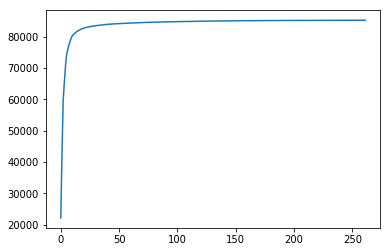

In [52]:
cumul=np.cumsum(counts)
plot(cumul)

In [48]:
cumul[-1]

85284

In [49]:
type(cumul)

numpy.ndarray

## Excercises

1. Count the total number of yearXstationXmeasurement  Records (YSMRs) for each country.
2. Count the number of YSMR's for each measurement.
3. Compute the mean P/M std of TOBS for each country and each state.